
Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на\ ранней стадии выявлять студентов, находящихся в группе риска.

Для этого нужно построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

переменные, которые содержит датасет:\
1 school — аббревиатура школы, в которой учится ученик\
2 sex — пол ученика ('F' - женский, 'M' - мужской\
3 age — возраст ученика (от 15 до 22)\
4 address — тип адреса ученика ('U' - городской, 'R' - за городом)\
5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)\
6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)\
7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)\
8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)\
9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не\ работает, 'other' - другое)\
10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home'- не работает,\
'other' - другое)\
11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная\ программа, 'other' - другое)\
12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)\
13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)\
14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)\
15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)\
16 schoolsup — дополнительная образовательная поддержка (yes или no\
17 famsup — семейная образовательная поддержка (yes или no)\
18 paid — дополнительные платные занятия по математике (yes или no)\
19 activities — дополнительные внеучебные занятия (yes или no)\
20 nursery — посещал детский сад (yes или no)\
21 higher — хочет получить высшее образование (yes или no)\
22 internet — наличие интернета дома (yes или no)\
23 romantic — в романтических отношениях (yes или no)\
24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)\
25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)\
26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)\
27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)\
28 absences — количество пропущенных занятий\
29 score — баллы по госэкзамену по математике

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

df = pd.read_csv('stud_math.xls')

In [2]:
# Предварительный анализ
display(df.head(10))
df.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
print(df.shape) # мы увидим информацию о размерности нашего датафрейма 

(395, 30)


Наш датасет состоит из 395 строк, 30 столбцов
При предварительном осмотре наших данных сразу видим наличие пропусков, и данные достаточно не чистые 
Из 30 признаков - 13 числового типа, и 17 нечислового. И 3 числовых признака-это возвраст/age; пропуски занятий/absences
и наша независимая переменная-баллы по матетематике/score. 
Все остальные 27 признаков - категориальные и бинарные, к последнему отнесем временно столбец studytime_granular, о котором нет информации 


### Первичный анализ данных в столбцах. Часть I

In [4]:
# Посмотрим название столбцов нашего датасета
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [5]:
# Для удобства переименуем столбцы
# df.columns = [x.split()[0].lower() for x in df.columns]
df.columns = [x.lower() for x in df.columns]
#df.rename(str.lower, axis='columns')
df.rename({'studytime, granular':'studytime_granular'},axis='columns', inplace=True)
#df['studytime, granular'].set_axis(['studytime_granular'], axis = 1, inplace = True)
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [6]:
df.describe(include='all') # показывает статистики count,mean, std, min, 25%-50%-75% percentile, max 

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
count,395,395,395.000000,378,368,350,392.000000,371.000000,376,359,378,364,367.000000,388.000000,373.000000,386,356,355,381,379,388.000000,375,361,364,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,NaN,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,yes,yes,NaN,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,295,261,314,NaN,NaN,133,197,137,250,NaN,NaN,NaN,335,219,200,195,300,NaN,356,305,240,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.750000,2.614555,NaN,NaN,NaN,NaN,1.438692,2.038660,0.337802,NaN,NaN,NaN,NaN,NaN,-6.115979,NaN,NaN,NaN,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.098127,2.228732,NaN,NaN,NaN,NaN,0.694181,0.842078,0.743135,NaN,NaN,NaN,NaN,NaN,2.526235,NaN,NaN,NaN,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-12.000000,NaN,NaN,NaN,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-6.000000,NaN,NaN,NaN,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-6.000000,NaN,NaN,NaN,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-3.000000,NaN,NaN,NaN,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000


In [7]:
df.nunique() # количество уникальных значений для каждого столбца 

school                 2
sex                    2
age                    8
address                2
famsize                2
pstatus                2
medu                   5
fedu                   6
mjob                   5
fjob                   5
reason                 4
guardian               3
traveltime             4
studytime              4
failures               4
schoolsup              2
famsup                 2
paid                   2
activities             2
nursery                2
studytime_granular     4
higher                 2
internet               2
romantic               2
famrel                 6
freetime               5
goout                  5
health                 5
absences              36
score                 18
dtype: int64

По анализу уникальных значений, сразу можно посмотреть на наличие выбросов в категорийных переменных, потому из данных очевидно сколько должно быть уникальных значений.
В итоге будем проверять столбцы, в которых уникалальных значений больше, чем должно быть, и это говорит о выбросах в них:\
fedu           6 должно быть 5\
famrel         6 должно быть 5\
Выбросы в числовых данных будем рассмаривать в отдельности. \
Так же отдельно будем смотреть studytime_granular как категориальный или нет, 4 уникальных значений 


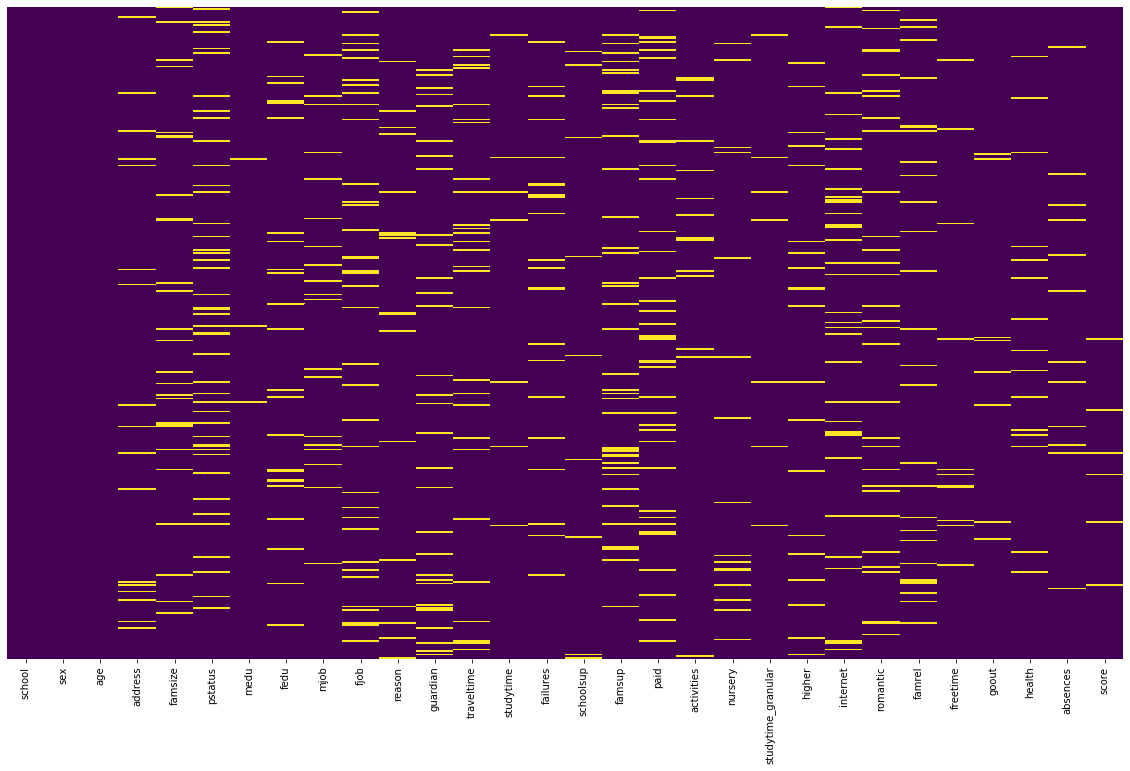

In [8]:
# Визуально оценим количество пропусков и их распределение:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Визуальное убеждаемся в наличии большего распределения пропусков и их наличия в наших переменных, но их не на столько много, чтобы удалять какие-либо столбцы

In [9]:
# Посмотрим на количественный показатель пропусков в данных
df.isnull().sum().sort_values()

school                 0
sex                    0
age                    0
medu                   3
score                  6
studytime_granular     7
studytime              7
goout                  8
schoolsup              9
freetime              11
absences              12
activities            14
health                15
nursery               16
address               17
reason                17
mjob                  19
higher                20
failures              22
fedu                  24
famrel                27
famsize               27
traveltime            28
guardian              31
romantic              31
internet              34
fjob                  36
famsup                39
paid                  40
pstatus               45
dtype: int64

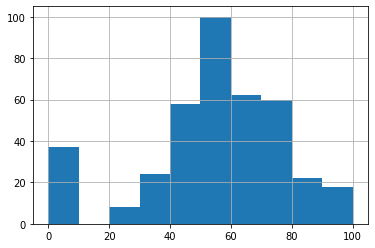

In [10]:
# Рассмотрим распределение нашей независимой переменной
df.score.hist()

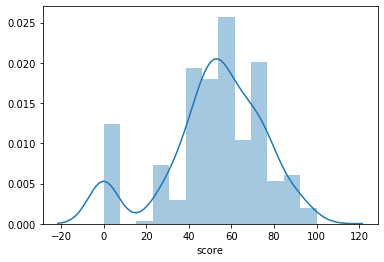

In [11]:
sns.distplot(df.score)

По анализу столбца score видим что выбросов нет, есть нулевые значения, которые в реальности имееют место быть, и есть пропуски, которые будем учитывать, как отдельный признак

### Первичный анализ данных в столбцах. Часть II - Числовые переменные

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

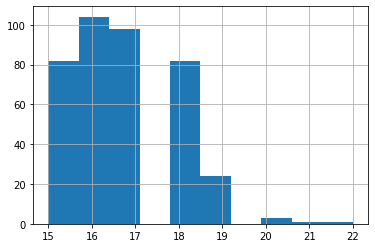

In [12]:
# age/возраст - посмотрим распределение признака:
df.age.hist()
df.age.describe()

In [13]:
# По возрасту видим среднее значение 17 лет, min 15, max 22, и выбросов не наблюдается

count    395.000000
mean       2.870661
std        0.071139
min        2.773000
25%        2.833000
50%        2.890000
75%        2.944000
max        3.135000
Name: age, dtype: float64

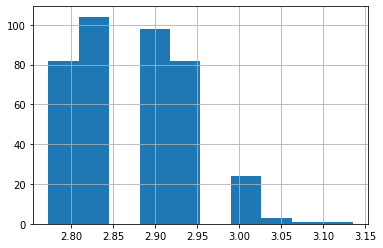

In [14]:
# Поскольку в нашей перемееной так же есть большой перепад значений, поэтому попробуем логарифмировать переменную
df.age = df.age.apply(lambda w: np.log(w + 1)).round(3)
df.age.hist()
df.age.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

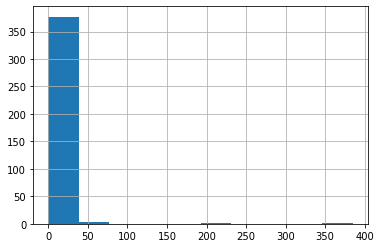

In [15]:
# absences/пропуски занятий - посмотрим распределение признака:
df.absences.hist()
df.absences.describe()

In [16]:
# В absences есть выбросы, и max=385, что достаточно очень отличается от нормального распределения

count    383.000000
mean       1.396781
std        1.100824
min        0.000000
25%        0.000000
50%        1.609000
75%        2.197000
max        5.956000
Name: absences, dtype: float64

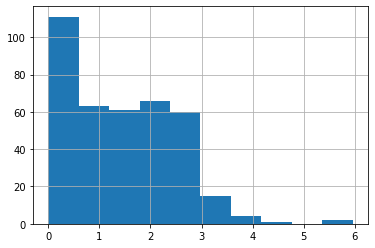

In [17]:
# в этой перемееной тоже есть большой перепад значений,- попробуем логарифмировать переменную

df.absences = df.absences.apply(lambda w: np.log(w + 1)).round(3)
df.absences.hist()
df.absences.describe()

In [18]:
# Сделаем minmax нормализацию для числовых признаков, чтобы далее лучше обучить модель для заполнения пропусков в нашей перепеменной absences 
from sklearn.preprocessing import MinMaxScaler
#df_2 = df.loc[df.absences<4.8] # ограним датасет от больших выбросов, чтобы точнее научить модель

test_data = df.loc[:, ['age', 'absences']]
scaler = MinMaxScaler()
data = scaler.fit_transform(test_data)
df_m3 = pd.DataFrame({'age_n':data[:,0],'absences_n':data[:,1]}).round(2)

df['age'] = df_m3['age_n']
df['absences'] = df_m3['absences_n']

In [19]:
# Вместо замены пропусков средним значением,
# по методу  линейн.регрессии научим модель прогнозировать переменную absences, и заполним пропуски в этой переменной

from sklearn.model_selection import train_test_split# инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели
# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

df_2 = df.loc[df.absences<4.8]
train_df = df_2.loc[:, ['age','absences']].dropna()
#test_df = df[pd.isna(df.absences)== True]['age']#.values #.reshape((-1, 1))

Y= train_df['absences'].values 
X = train_df['age'].values.reshape((-1, 1))


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3)

from sklearn.linear_model import LinearRegression
myModel = LinearRegression() #Обозначаем, что наша модель - линейная регрессия
myModel.fit(X_train,Y_train) #обучаем модель на обучающих данных

y_pred = myModel.predict(X_test)


In [20]:
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))

MAE: 0.13617759856891798


In [21]:
test_df = df[pd.isna(df.absences)== True]['age'].values.reshape((-1, 1))
y2=myModel.predict(test_df)
absences_nan = pd.Series(y2).round(2)
for a in absences_nan:
    df.absences = df.absences.apply(lambda x: a if pd.isnull(x) else a if x == 'nan'else x) # заменили пропуски на предсказанные значения

df.absences.isna().sum() # проверим остались ли пропуски

0

count    395.000000
mean       0.232886
std        0.182289
min        0.000000
25%        0.000000
50%        0.270000
75%        0.370000
max        1.000000
Name: absences, dtype: float64

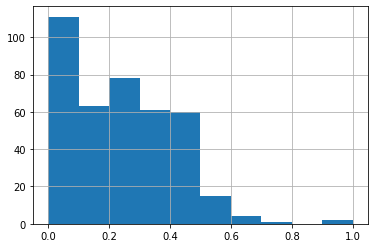

In [22]:
# визуально посмотрим на преобразавание признака
df.absences.hist()
df.absences.describe()

In [23]:
# Значение более згладились, исключим выбросы и скратим длинный "хвост" значений, примерно до 0.8
df = df.loc[df.absences<0.8] 
df.reset_index(drop=True, inplace=True)  #сбросим индексы


Оставим прогнозные значения, в любом случае, можно вернуться и заменить их на 0 или среднее значение.

### Первичный анализ данных в столбцах. Часть II - Категориальные переменные

Из предварительного анализа столбцы fedu и failures имеют уникалальных значений больше, чем должно быть, поэтому посмотрим на них в отдельности

In [24]:
print(df.fedu.value_counts())
print(df.famrel.value_counts())

2.0     105
3.0      95
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64
 4.0    182
 5.0     98
 3.0     62
 2.0     16
 1.0      7
-1.0      1
Name: famrel, dtype: int64


In [25]:
# Очевидно эти лишние уникальные знаяения ошибочны, логично заменим их на 4 и 1
df.fedu.loc[(df.fedu == 40)] = 4
df.famrel.loc[(df.famrel == -1)] = 1
# Проверим
print(df.fedu.value_counts())
print(df.failures.value_counts())

2.0    105
3.0     95
4.0     89
1.0     78
0.0      2
Name: fedu, dtype: int64
0.0    292
1.0     49
2.0     15
3.0     15
Name: failures, dtype: int64


Так же из предварительного анализа подметили столбец studytime_granular\
Проверим его

-6.0     192
-3.0     103
-9.0      64
-12.0     27
Name: studytime_granular, dtype: int64

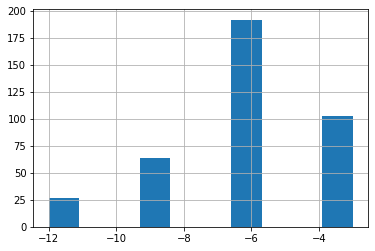

In [26]:
df.studytime_granular.hist()
df.studytime_granular.describe()
df.studytime_granular.value_counts()

По гистограмме и значениям понимаем, что это категорийный признак с минусовыми значениями\
Ниже для наглядности посмотрим на столбец с похожим названием studytime

2.0    192
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

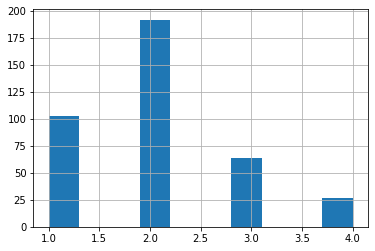

In [27]:
df.studytime.hist()
df.studytime.describe()
df.studytime.value_counts()

В итоге видим что между значениями столбцов прямая  линейная обратная зависимость с коэффециентом -3, 
и корреляционный анализ это нам должен показать высокую скоррелированность признаков

 По скольку катег.признаков много, и все нужно проверить и произвести очистку данных, то для этого лучше сделать одну функцию,
 

In [28]:
def stack (nor):
    for i in nor:
        #if nor[i].dtype == 'object':
        if nor[i].nunique()>2: 
            nor[i] = nor[i].apply(lambda x: None if pd.isnull(x) else None if x == 'nan'else x) # для Dummy-переменной
        else:
            a = (nor[i].describe())[2]
            nor[i] = nor[i].apply(lambda x: a if pd.isnull(x) else a if x == 'nan'else x) # заменяем пропуски тор-значением
            
    return nor
    

### Корреляционный анализ

In [29]:
df2 = df.loc[:, ['age', 'absences', 'score']]
df2.corr(method='pearson')

,age,absences,score
age,1.000000,0.138008,-0.153721
absences,0.138008,1.000000,0.156791
score,-0.153721,0.156791,1.000000


По анализу числовые переменные мало скоррелированы с нашей независимой переменной, у нас всего 2 числовых переменных, корреляция между которыми тоже низкая.

In [30]:
# Но поскольку у нас есть категорийные переменные в числового типа, то можем посмотреть и на их корреляию   
df2 = df.select_dtypes(exclude ='object')
df2.corr(method='pearson')

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161422,-0.159929,0.088116,-0.016703,0.205719,0.016703,0.052368,0.013250,0.131758,-0.066422,0.138008,-0.153721
medu,-0.161422,1.000000,0.626567,-0.176380,0.078509,-0.244267,-0.078509,-0.016460,0.028320,0.062615,-0.045223,0.096695,0.216238
fedu,-0.159929,0.626567,1.000000,-0.145703,0.012900,-0.271509,-0.012900,-0.022049,-0.023350,0.046331,0.024808,0.011520,0.129242
traveltime,0.088116,-0.176380,-0.145703,1.000000,-0.102496,0.068639,0.102496,-0.023664,-0.019325,0.035855,-0.021494,-0.013690,-0.068914
studytime,-0.016703,0.078509,0.012900,-0.102496,1.000000,-0.180014,-1.000000,0.039753,-0.122321,-0.051685,-0.080049,-0.045979,0.116202
failures,0.205719,-0.244267,-0.271509,0.068639,-0.180014,1.000000,0.180014,-0.019835,0.088120,0.115095,0.079300,0.051494,-0.344276
studytime_granular,0.016703,-0.078509,-0.012900,0.102496,-1.000000,0.180014,1.000000,-0.039753,0.122321,0.051685,0.080049,0.045979,-0.116202
famrel,0.052368,-0.016460,-0.022049,-0.023664,0.039753,-0.019835,-0.039753,1.000000,0.167730,0.064116,0.083675,-0.092665,0.065547
freetime,0.013250,0.028320,-0.023350,-0.019325,-0.122321,0.088120,0.122321,0.167730,1.000000,0.294446,0.059978,-0.012279,0.021493
goout,0.131758,0.062615,0.046331,0.035855,-0.051685,0.115095,0.051685,0.064116,0.294446,1.000000,-0.018411,0.117058,-0.122992


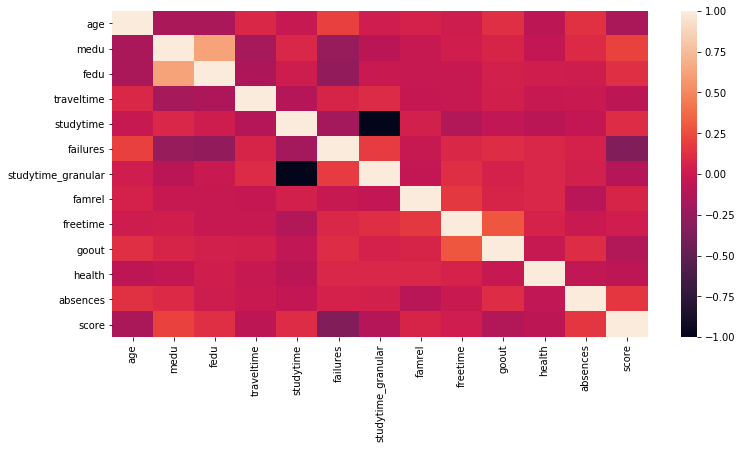

In [31]:
# представим корреляционную матрицу в виде "тепловой карты" с помощью функции heatmap из библиотеки seaborn
plt.figure(figsize=(12,6)) # размер графика
#sns.heatmap(data=df2, annot=True)
sns.heatmap(df2.corr())

В итоге присутствует большая корреляция между fedu & medu, fedu & failures, medu & failures, а также как видим очевидную зависимость между studytime & studytime_granular.
Поскольку это это категорийные признаки, то итоги подведем после их анализа.

### Анализ номинативных переменных

Визуально посмотрим на плотность распределения переменных

In [32]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
        data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:5])],
        ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

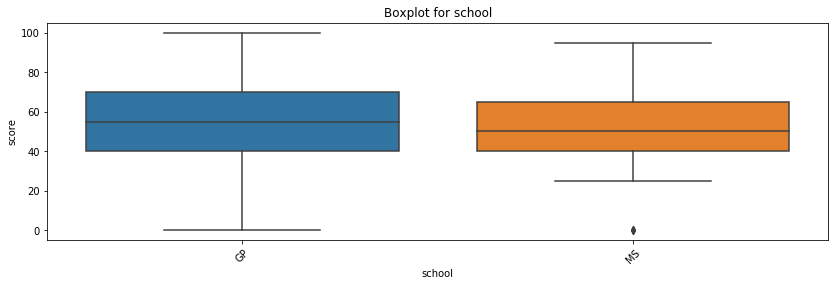

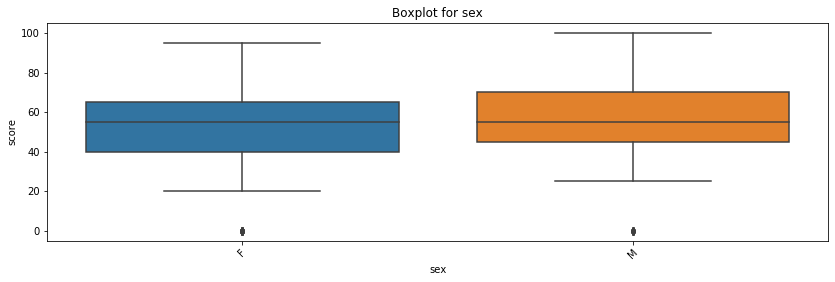

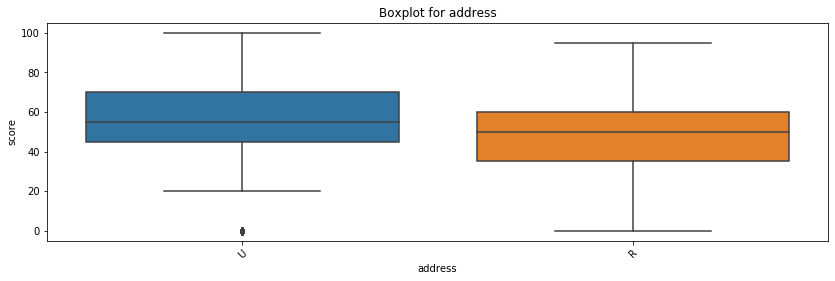

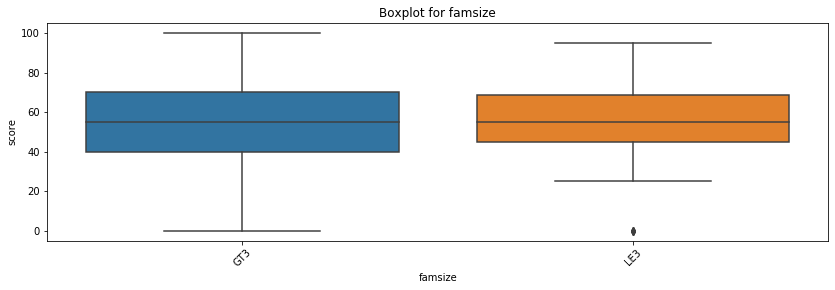

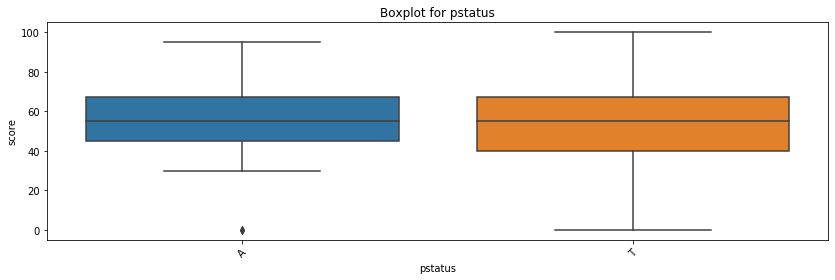

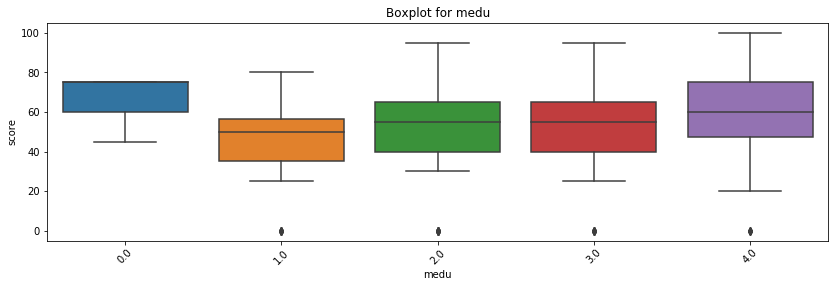

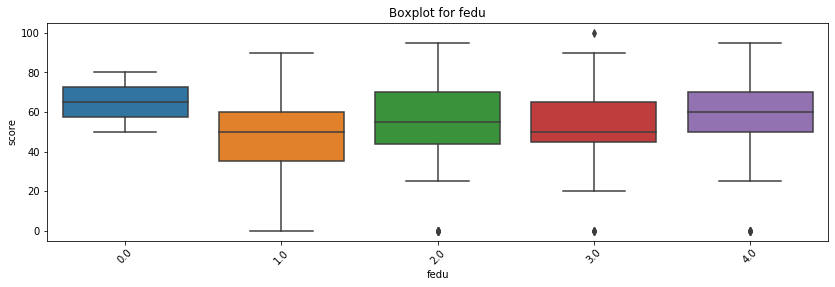

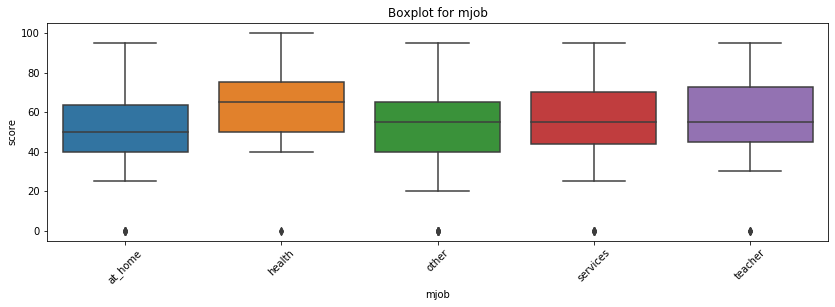

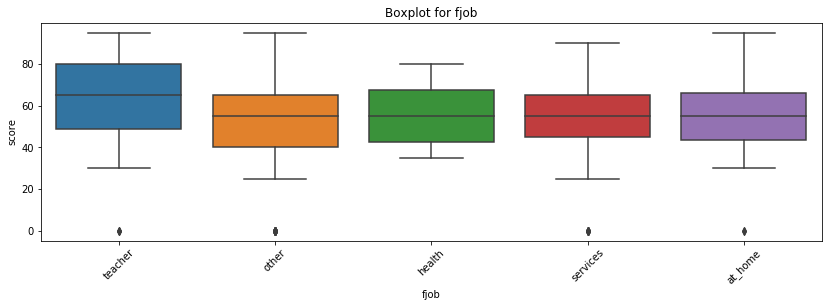

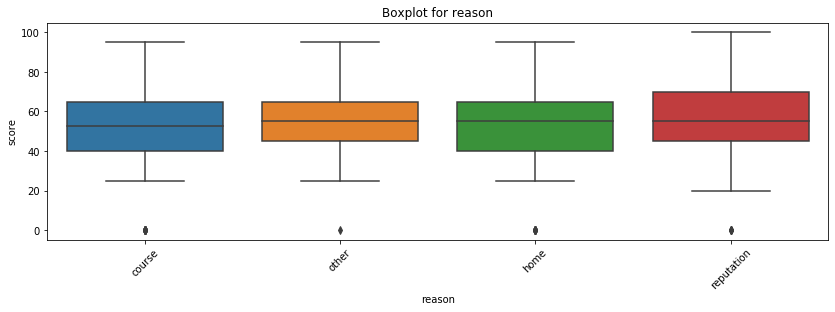

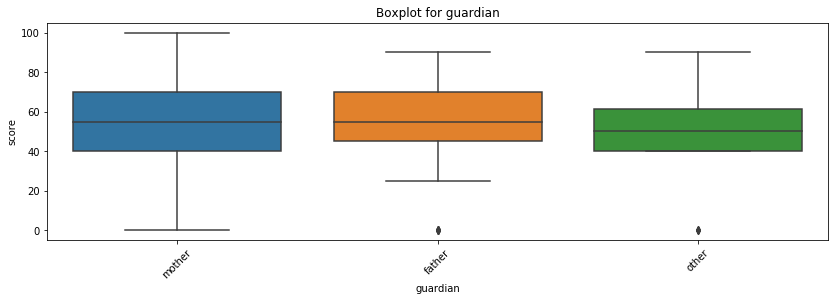

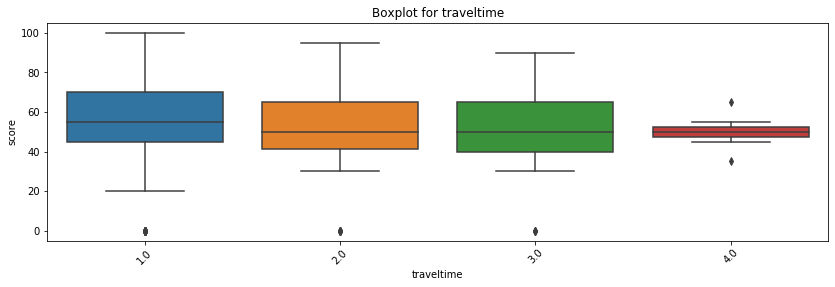

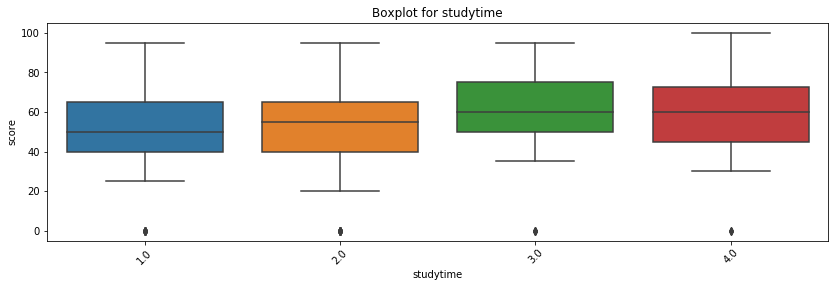

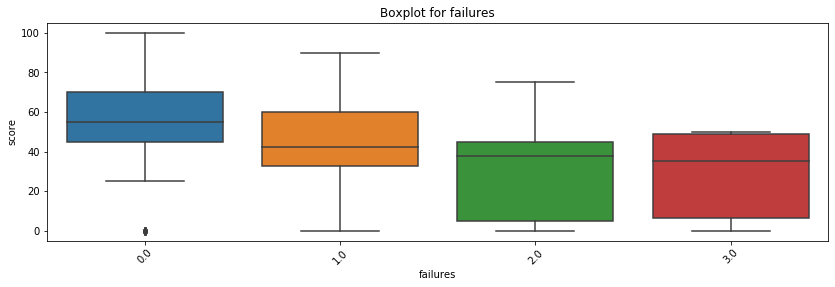

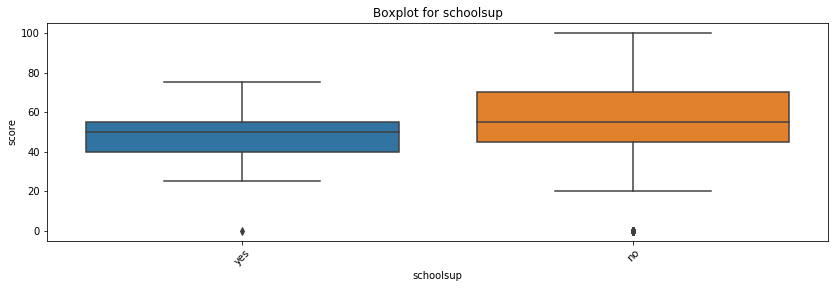

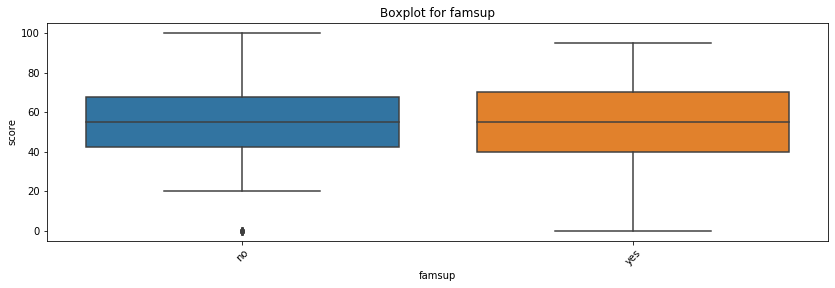

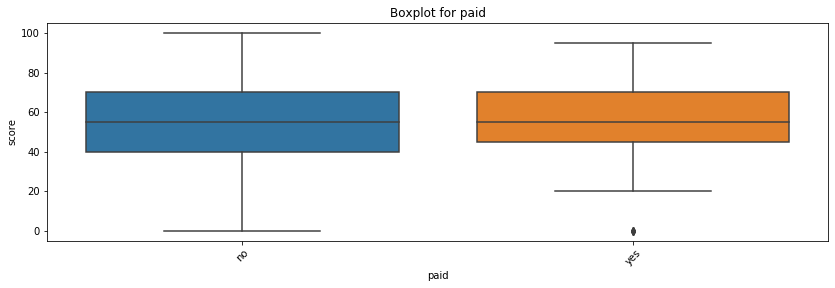

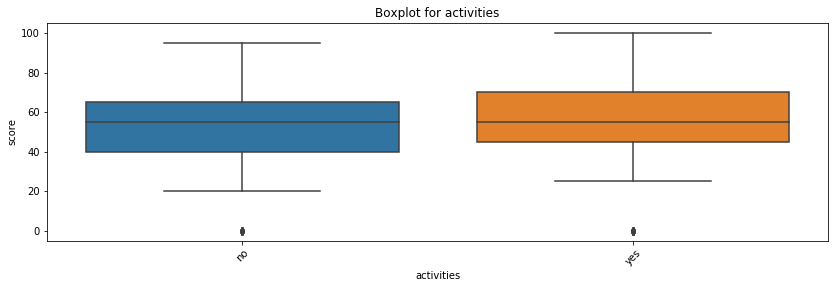

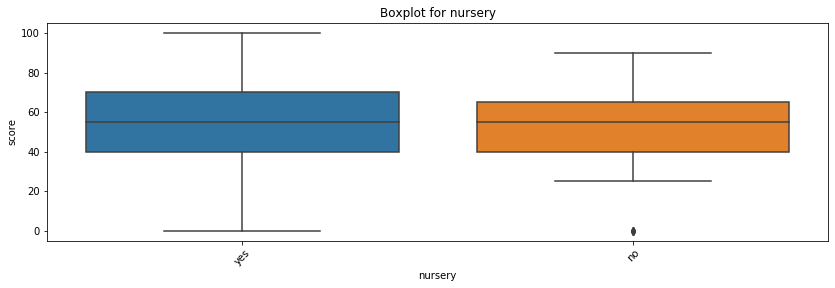

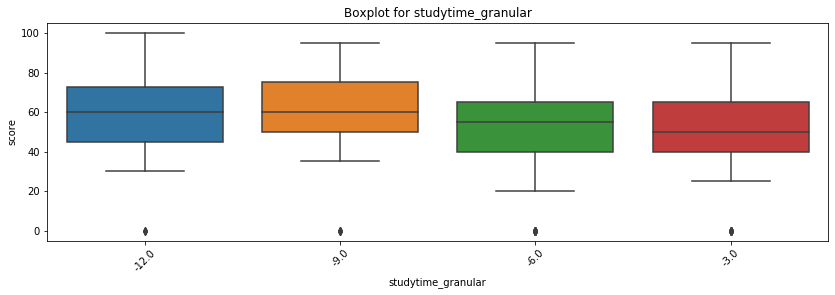

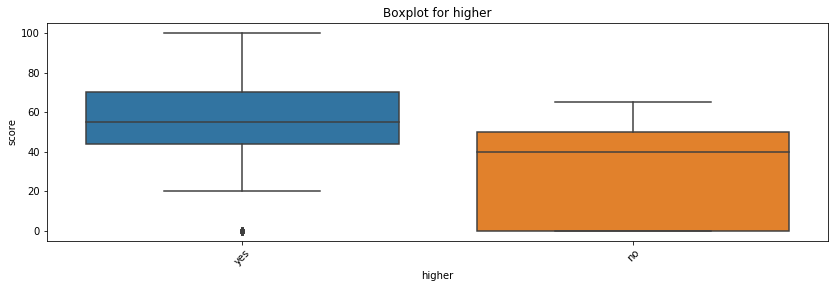

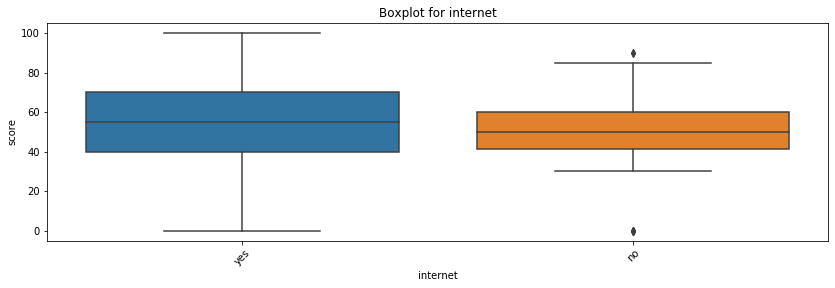

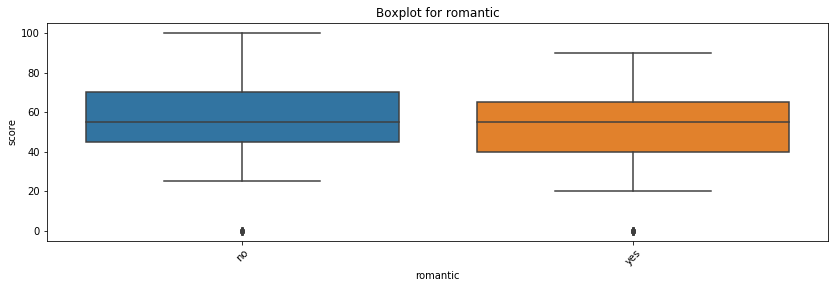

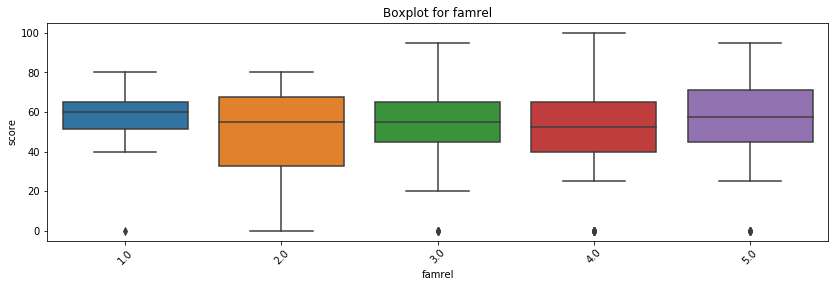

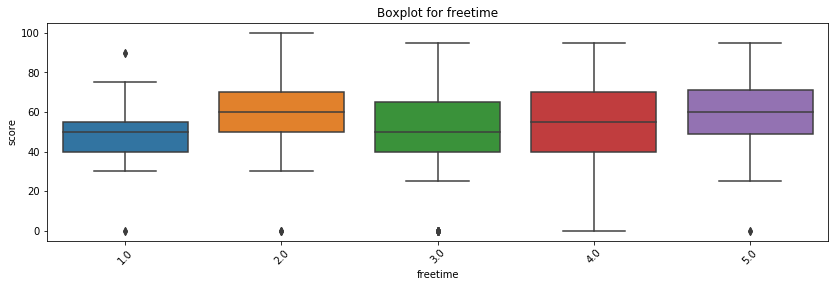

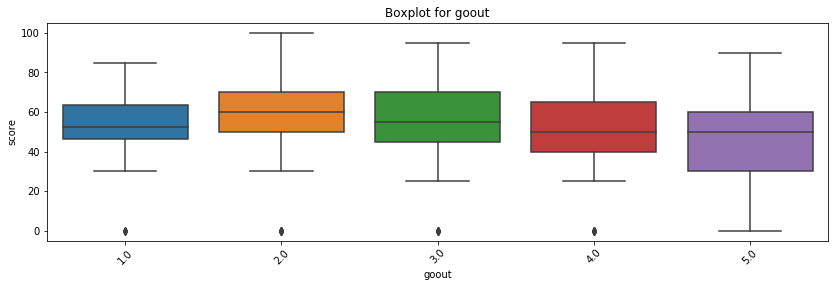

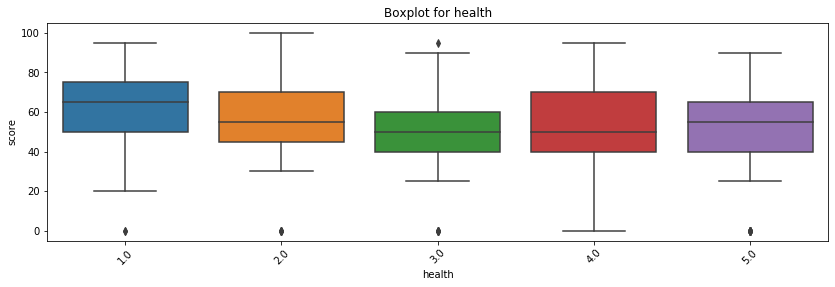

In [33]:
df_a = df.drop(['score', 'age', 'absences'], axis=1)
for col in df_a:
    get_boxplot(col)

Визуально замечаем, что не многие признаки (health, higher, freetime, failures, studytime, mjob, goout, medu) влияют на оценку

In [34]:
# Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. 
# Проверим нулевую гипотезу о том, что распределения оценоки score по различным параметрам неразличимы:

def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [36]:
df_a = df.drop(['score', 'age', 'absences'], axis=1)
for col in df_a:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки mjob


Как мы видим, серьёзно отличаются только параметр mjob. Но мы для обучения модели оставим и те, которые выделили на грфике box-plot, таким образом вместе с числовыми признаками составим датасет для модели

In [37]:
df_m = df.loc[:, ['health', 'higher', 'freetime', 'failures', 'studytime', 'goout', 'mjob', 'medu', 'age', 'absences']]
df_m.head()

,health,higher,freetime,failures,studytime,goout,mjob,medu,age,absences
0,3.0,yes,3.0,0.0,2.0,4.0,at_home,4.0,0.47,0.33
1,3.0,yes,3.0,0.0,2.0,3.0,at_home,1.0,0.32,0.27
2,3.0,yes,3.0,3.0,2.0,2.0,at_home,1.0,0.00,0.40
3,5.0,yes,2.0,0.0,3.0,2.0,health,4.0,0.00,0.18
4,5.0,yes,3.0,0.0,2.0,2.0,other,3.0,0.17,0.27


Выводы по результатам EDA для анализа влияния параметров на оценку госэкзамена по математике, следующие:
1. Данных много, но имеются пропуски - и больше всего в столбце pstatus (более 10%) - столбец содержит информацию совместного проживания родителей, поэтому можно сказать, что этот столбец, как и многие другие из всего датасета содержат информацию личного и семейного характера, которую при опросе намеренно не указывали.
2. В данных не много выбросов, что говорит о достаточно чистых данных.
3. Числовых данных мало - обратная корреляция оценки с возрастом, может говорить, что чем старше ученик чем будет хуже оценка, возможно из за того,что со временем знания забываются, снижается способность учиться, или старшие ученики заняты работой. И положительная корреляция оценки с пропусками занятий по математике логична, чем больше ученик пропустил занятий, тем хуже оценка.
4. Т- тест отсеял все признаки, кроме признака mjob, но для модели оставили больше признаков.
5. Для модели оставили следующие столбцы - health, higher, freetime, failures, studytime, goout, mjob, medu, age, absences

### Окончательная подготовка признаков для модели

На данном этапе проделаем следующие шаги:
1. Создадим еще один числовой признак на основе имеющихся
2. Сгруппируем/объединим ответы в некоторых категорийных столбцах по средним значениям
3. Заменим категориальные признаки на Gammy-кодирование, с учетом пропусков, которые будут учитывать, как отдельный признак

count    387.000000
mean       3.645891
std        1.219218
min        0.000000
25%        3.710000
50%        4.030000
75%        4.260000
max        4.620000
Name: score, dtype: float64

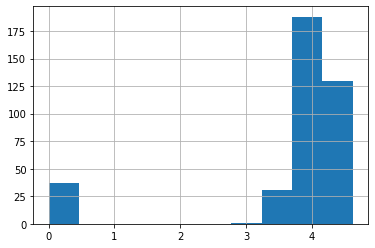

In [38]:
# Поскольку в нашей перемееной есть большой перепад значений, поэтому попробуем для создания модели логарифмировать целевую переменную score
df.score = df.score.apply(lambda w: np.log(w + 1)).round(2)
df.score.hist(bins=10)
df.score.describe()

In [39]:

df_m = df.loc[:, ['health', 'higher', 'freetime', 'failures', 'studytime', 'goout', 'mjob', 'medu', 'age', 'absences', 'score']]
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   health     378 non-null    float64
 1   higher     373 non-null    object 
 2   freetime   382 non-null    float64
 3   failures   371 non-null    float64
 4   studytime  386 non-null    float64
 5   goout      385 non-null    float64
 6   mjob       374 non-null    object 
 7   medu       390 non-null    float64
 8   age        393 non-null    float64
 9   absences   393 non-null    float64
 10  score      387 non-null    float64
dtypes: float64(9), object(2)
memory usage: 33.9+ KB


In [40]:
# создадим новые числовые полиномиальные признаки, возведя имеющиеся числовые признаки age и absences в 2 степень

from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(2)
data = pf.fit_transform(df_m[['age', 'absences']])

#df_m2 = pd.DataFrame.from_records(x)
df_m2 = pd.DataFrame({'ag_ab_new1':data[:,2],'ag_ab_new2':data[:,3], 'ag_ab_new3':data[:,4], 'ag_ab_new4':data[:,5]}).round(3)
df_m2

,ag_ab_new1,ag_ab_new2,ag_ab_new3,ag_ab_new4
0,0.33,0.221,0.155,0.109
1,0.27,0.102,0.086,0.073
2,0.40,0.000,0.000,0.160
3,0.18,0.000,0.000,0.032
4,0.27,0.029,0.046,0.073
...,...,...,...,...
388,0.00,0.221,0.000,0.000
389,0.23,0.102,0.074,0.053
390,0.23,0.774,0.202,0.053
391,0.00,0.221,0.000,0.000


In [41]:
# Перегруппируем/объединим данные в некоторых категорийных столбцах по медианным значениям из анализа 
# визуализации распределения числовых признаков, проделанную с использованием боксплотов 

In [42]:
# Поскольку столбцы имеют разные варианты значений, то напишем для каждого столбца отдельную функцию:
def fyr (col):
    if pd.isnull(col) or col == 'nan':
        return col
    else:
        if col == 1:
            return col
        elif col== 5:
            return 3
        else:
            return 2

df_m['health_new'] = df_m['health'].apply(lambda x: fyr(x))

In [43]:
def fyr2 (col):
    if pd.isnull(col) or col == 'nan':
        return col
    else:
        if col == 1 or col==3:
            return 1
        #elif col== 4:
            #return 3
        else:
            return 2
        
df_m['freetime_new'] = df_m['freetime'].apply(lambda x: fyr2(x))

In [44]:
def fyr3 (col):
    if pd.isnull(col) or col == 'nan':
        return col
    else:
        if col == 0:# or col==1:
            return col
        else:
            return 1

df_m['failures_new'] = df_m['failures'].apply(lambda x: fyr3(x))

In [45]:
def fyr4 (col):
    if pd.isnull(col) or col == 'nan':
        return col
    else:
        if col ==4:
            return 3
        else:
            return col

df_m['studytime_new'] = df_m['studytime'].apply(lambda x: fyr4(x))

In [46]:
def fyr5 (col):
    if pd.isnull(col) or col == 'nan':
        return col
    else:
        if col == 0 or col==1:
            return 0
        else:
            return 1
        
df_m['medu_new'] = df_m['medu'].apply(lambda x: fyr5(x))

In [47]:
def fyr6 (col):
    if pd.isnull(col) or col == 'nan':
        return col
    else:
        if col == 'teacher':
            return 1
        else:
            return 0
        
df_m['mjob_new'] = df_m['mjob'].apply(lambda x: fyr6(x))

In [48]:
def fyr7 (col):
    if pd.isnull(col) or col == 'nan':
        return col
    else:
        if col == 2 or col==3:
            return col
        else:
            return 1
        
df_m['goout_new'] = df_m['goout'].apply(lambda x: fyr7(x))

In [49]:
# Создадим дополнительный столбец для gammy-кодирования по столбцу score, в котором имеющееся значение равно 1, а пропуск остается Nan 
def fyr8 (col):
    if pd.isnull(col) or col == 'nan':
        return col
    else:
        return 1
    
df_m['score_new'] = df_m['score'].apply(lambda x: fyr8(x))

In [50]:
# После всех преобразований сделаем gammy-кодирование
for i in ['health_new', 'higher', 'freetime_new', 'failures_new', 'studytime_new', 'goout_new', 'mjob_new', 'medu_new', 'score_new']:
    df_m = pd.get_dummies(df_m, columns=[i], dummy_na=True)

In [51]:
# Для модели заменим пропуски на 0 в целевой переменной, и оставим только числовые столбцы
df_m['score'] = df_m['score'].fillna(0)
df_MOD = df_m.drop(['health', 'freetime', 'failures', 'studytime', 'goout', 'mjob', 'medu'], axis='columns')
df_MOD = pd.concat([df_MOD, df_m2], axis=1) # объединяем с новыми числовыми признаками

In [52]:
df_MOD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                393 non-null    float64
 1   absences           393 non-null    float64
 2   score              393 non-null    float64
 3   health_new_1.0     393 non-null    uint8  
 4   health_new_2.0     393 non-null    uint8  
 5   health_new_3.0     393 non-null    uint8  
 6   health_new_nan     393 non-null    uint8  
 7   higher_no          393 non-null    uint8  
 8   higher_yes         393 non-null    uint8  
 9   higher_nan         393 non-null    uint8  
 10  freetime_new_1.0   393 non-null    uint8  
 11  freetime_new_2.0   393 non-null    uint8  
 12  freetime_new_nan   393 non-null    uint8  
 13  failures_new_0.0   393 non-null    uint8  
 14  failures_new_1.0   393 non-null    uint8  
 15  failures_new_nan   393 non-null    uint8  
 16  studytime_new_1.0  393 non